<strong>
    <font color="#0E1117">
        Author: lprtk
    </font>
</strong>

<br/>
<br/>


<Center>
    <h1 style="font-family: Arial">
        <font color="#0E1117">
            NLP: topic modeling using word2vec & LDA
        </font>
    </h1>
</Center>

-------------------------------------------------------------------------------------------------------------------------------

<div style="margin: 10px;">
    <h2 style="font-family: Arial">
        <font color="#0E1117">
            Introduction & context
        </font>
    </h2>
</div>

<p align="justify">
    The objective is to extract information and value from large volumes of textual data using Natural Language Processing (NLP). This notebook focuses on the use of the word2vec algorithm to represent and study the existing similarities between the words of several documents and on the combination of word2vec and the unsupervised learning algorithm LDA to perform topic modeling by grouping the documents by topic and by detailing the keywords of each document.
<p>

-------------------------------------------------------------------------------------------------------------------------------

<div style="margin: 10px;">
    <h2 style="font-family: Arial">
        <font color="#0E1117">
            Librairies import
        </font>
    </h2>
</div>

In [1]:
from gensim import corpora
from gensim.models import LdaMulticore, Word2Vec
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import pandas as pd
#from pyLDAvis import gensim_models
#pyLDAvis.enable_notebook()
from pyTCTK import TextNet
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud

-------------------------------------------------------------------------------------------------------------------------------

<div style="margin: 10px;">
    <h2 style="font-family: Arial">
        <font color="#0E1117">
            Data import
        </font>
    </h2>
</div>

In [2]:
df_data = pd.read_csv(filepath_or_buffer="papers.csv", sep=",")

In [3]:
df_data.head(3)

,year,title,abstract,text
0,1987,Self-Organization of Associative Database and ...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,1987,A Mean Field Theory of Layer IV of Visual Cort...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,1988,Storing Covariance by the Associative Long-Ter...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...


-------------------------------------------------------------------------------------------------------------------------------

<div style="margin: 10px;">
    <h2 style="font-family: Arial">
        <font color="#0E1117">
            Text cleaning
        </font>
    </h2>
</div>

<p style="text-align: justify">
    We clean up the text in order to normalize it (lowercase, punctuation, etc.), remove all special characters and words that don't make sense or don't provide any information (stopwords) and then we transform words with a common root into a single word (lemmatization).
</p>

<div style="margin: 10px;">
    <h3 style="font-family: Arial">
        <font color="#0E1117">
            1) Lowercase
        </font>
    </h3>
</div>

In [4]:
df_data = TextNet(
    data=df_data,
    column="text"
).lowercase()

<div style="margin: 10px;">
    <h3 style="font-family: Arial">
        <font color="#0E1117">
            2) Punctuation
        </font>
    </h3>
</div>

In [5]:
df_data = TextNet(
    data=df_data,
    column="text"
).remove_punctuation()

<div style="margin: 10px;">
    <h3 style="font-family: Arial">
        <font color="#0E1117">
            3) Specific cleaning
        </font>
    </h3>
</div>

In [6]:
df_data = TextNet(
    data=df_data,
    column="text"
).remove_url()

In [7]:
df_data = TextNet(
    data=df_data,
    column="text"
).remove_html()

In [8]:
df_data = TextNet(
    data=df_data,
    column="text"
).remove_email()

In [9]:
df_data = TextNet(
    data=df_data,
    column="text"
).remove_digit()

In [10]:
df_data = TextNet(
    data=df_data,
    column="text"
).remove_mention()

In [11]:
df_data = TextNet(
    data=df_data,
    column="text"
).remove_single_character()

In [12]:
df_data = TextNet(
    data=df_data,
    column="text"
).additional_cleaning(
    add_regexs=None
)

<div style="margin: 10px;">
    <h3 style="font-family: Arial">
        <font color="#0E1117">
            4) Remove stopwords
        </font>
    </h3>
</div>

In [13]:
def remove_stopword(text : str) -> str:
    list_stopwords = stopwords.words("english")
    return " ".join(
        [word for word in word_tokenize(text) if word not in list_stopwords]
    )

df_data["text"] = df_data["text"].apply(remove_stopword)

<div style="margin: 10px;">
    <h3 style="font-family: Arial">
        <font color="#0E1117">
            5) Lemmatization process
        </font>
    </h3>
</div>

In [14]:
def lemmatize(text : str) -> str:
    lemmatizer = WordNetLemmatizer()
    return " ".join(
        [lemmatizer.lemmatize(word) for word in word_tokenize(text)]
    )

df_data["text"] = df_data["text"].apply(lemmatize)

<div style="margin: 10px;">
    <h3 style="font-family: Arial">
        <font color="#0E1117">
            6) Remove spaces
        </font>
    </h3>
</div>

In [15]:
df_data = TextNet(
    data=df_data,
    column="text"
).remove_space()

In [16]:
df_data = TextNet(
    data=df_data,
    column="text"
).remove_whitespace()

<div style="margin: 10px;">
    <h3 style="font-family: Arial">
        <font color="#0E1117">
            7) Tokenization process
        </font>
    </h3>
</div>

In [17]:
df_data["text_tokenized"] = df_data["text"].apply(lambda x: word_tokenize(x))

In [18]:
df_data.head(3)

,year,title,abstract,text,text_tokenized
0,1987,Self-Organization of Associative Database and ...,Abstract Missing,self organization associative databaseand appl...,"[self, organization, associative, databaseand,..."
1,1987,A Mean Field Theory of Layer IV of Visual Cort...,Abstract Missing,mean field theory layer iv visual cortexand ap...,"[mean, field, theory, layer, iv, visual, corte..."
2,1988,Storing Covariance by the Associative Long-Ter...,Abstract Missing,storing covariance associativelongterm potenti...,"[storing, covariance, associativelongterm, pot..."


-------------------------------------------------------------------------------------------------------------------------------

<div style="margin: 10px;">
    <h2 style="font-family: Arial">
        <font color="#0E1117">
            Vectorization using Word2vec
        </font>
    </h2>
</div>

<div style="margin: 10px;">
    <h3 style="font-family: Arial">
        <font color="#0E1117">
            1) Build model
        </font>
    </h3>
</div>

In [19]:
w2v_model = Word2Vec(
    df_data["text_tokenized"],
    min_count=600,
    window=10,
    vector_size=250,
    alpha=0.03,
    min_alpha=0.0007,
    workers=4,
    seed=42
)

<div style="margin: 10px;">
    <h3 style="font-family: Arial">
        <font color="#0E1117">
            2) Words similarity
        </font>
    </h3>
</div>

In [20]:
sim_words = w2v_model.wv.most_similar("estimator")
print(sim_words)

[('estimate', 0.5724931359291077), ('estimation', 0.5269051790237427), ('mle', 0.5059700012207031), ('unbiased', 0.495898574590683), ('asymptotic', 0.4447108209133148), ('bootstrap', 0.43086543679237366), ('asymptotically', 0.42709803581237793), ('estimating', 0.3897428512573242), ('biased', 0.366697758436203), ('consistency', 0.36454662680625916)]


In [21]:
sim_words_2 = w2v_model.wv.most_similar("connectivity")
print(sim_words_2)

[('connection', 0.5102415084838867), ('topology', 0.46912881731987), ('brain', 0.4598551094532013), ('activity', 0.4584748446941376), ('inhibition', 0.43592286109924316), ('neuronal', 0.4307371973991394), ('coupling', 0.4195476472377777), ('adjacency', 0.4145083725452423), ('roi', 0.40956366062164307), ('inhibitory', 0.40140658617019653)]


In [22]:
sim_words_3 = w2v_model.wv.most_similar("synaptic")
print(sim_words_3)

[('synapsis', 0.7076360583305359), ('postsynaptic', 0.6981109976768494), ('presynaptic', 0.6471743583679199), ('plasticity', 0.6420440673828125), ('synapse', 0.6293298006057739), ('neuron', 0.5528512597084045), ('membrane', 0.5368080139160156), ('inhibitory', 0.5323248505592346), ('hebbian', 0.5072096586227417), ('neuronal', 0.5020508170127869)]


-------------------------------------------------------------------------------------------------------------------------------

<div style="margin: 10px;">
    <h2 style="font-family: Arial">
        <font color="#0E1117">
            Topic Modelling using LDA
        </font>
    </h2>
</div>

<div style="margin: 10px;">
    <h3 style="font-family: Arial">
        <font color="#0E1117">
            1) Create dictionary
        </font>
    </h3>
</div>

In [23]:
# dictionary
dictionary = corpora.Dictionary(df_data["text_tokenized"])

# term document frequency
doc_term_matrix = [dictionary.doc2bow(paper) for paper in df_data["text_tokenized"]]

In [24]:
print(doc_term_matrix[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 3), (5, 1), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 2), (12, 2), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 4), (19, 4), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


In [25]:
# human readable format of corpus (term frequency)
pd.DataFrame(
    [[(dictionary[id2word], frequency) for id2word, frequency in corpus] for corpus in doc_term_matrix[:1]]
).T.head(20)

,0
0,"(abolish, 1)"
1,"(accelerate, 1)"
2,"(acceptable, 1)"
3,"(accomplishes, 1)"
4,"(accordingly, 3)"
5,"(accordinglyin, 1)"
6,"(achieve, 1)"
7,"(achieved, 1)"
8,"(actual, 2)"
9,"(actualcompu, 1)"


<div style="margin: 10px;">
    <h3 style="font-family: Arial">
        <font color="#0E1117">
            2) Build model
        </font>
    </h3>
</div>

In [26]:
lda_model = LdaMulticore(
    corpus=doc_term_matrix,
    id2word=dictionary,
    num_topics=4,
    random_state=42,
    chunksize=200,
    passes=100,
    per_word_topics=True
)

In [27]:
lda_model.print_topics()

[(0,
  '0.016*"model" + 0.008*"data" + 0.006*"learning" + 0.006*"image" + 0.005*"using" + 0.005*"feature" + 0.005*"network" + 0.005*"distribution" + 0.004*"training" + 0.004*"method"'),
 (1,
  '0.011*"algorithm" + 0.007*"function" + 0.006*"learning" + 0.006*"problem" + 0.005*"set" + 0.004*"matrix" + 0.004*"method" + 0.004*"bound" + 0.004*"result" + 0.004*"data"'),
 (2,
  '0.002*"auction" + 0.002*"buyer" + 0.002*"revenue" + 0.002*"odor" + 0.002*"price" + 0.001*"seller" + 0.001*"bidder" + 0.001*"bee" + 0.001*"bid" + 0.001*"glomerulus"'),
 (3,
  '0.012*"network" + 0.007*"model" + 0.006*"neural" + 0.006*"input" + 0.005*"time" + 0.005*"learning" + 0.005*"system" + 0.004*"unit" + 0.004*"neuron" + 0.004*"output"')]

<div style="margin: 10px;">
    <h3 style="font-family: Arial">
        <font color="#0E1117">
            3) Topics' coherence
        </font>
    </h3>
</div>

In [28]:
coherence_model_lda = CoherenceModel(
    model=lda_model,
    texts=df_data["text_tokenized"],
    dictionary=dictionary,
    coherence="c_v"
)

coherence_lda = coherence_model_lda.get_coherence()
print(f"Coherence score: {round(coherence_lda, 4)}")

Coherence score: 0.317


<div style="margin: 10px;">
    <h3 style="font-family: Arial">
        <font color="#0E1117">
            4) Topics' keywords
        </font>
    </h3>
</div>

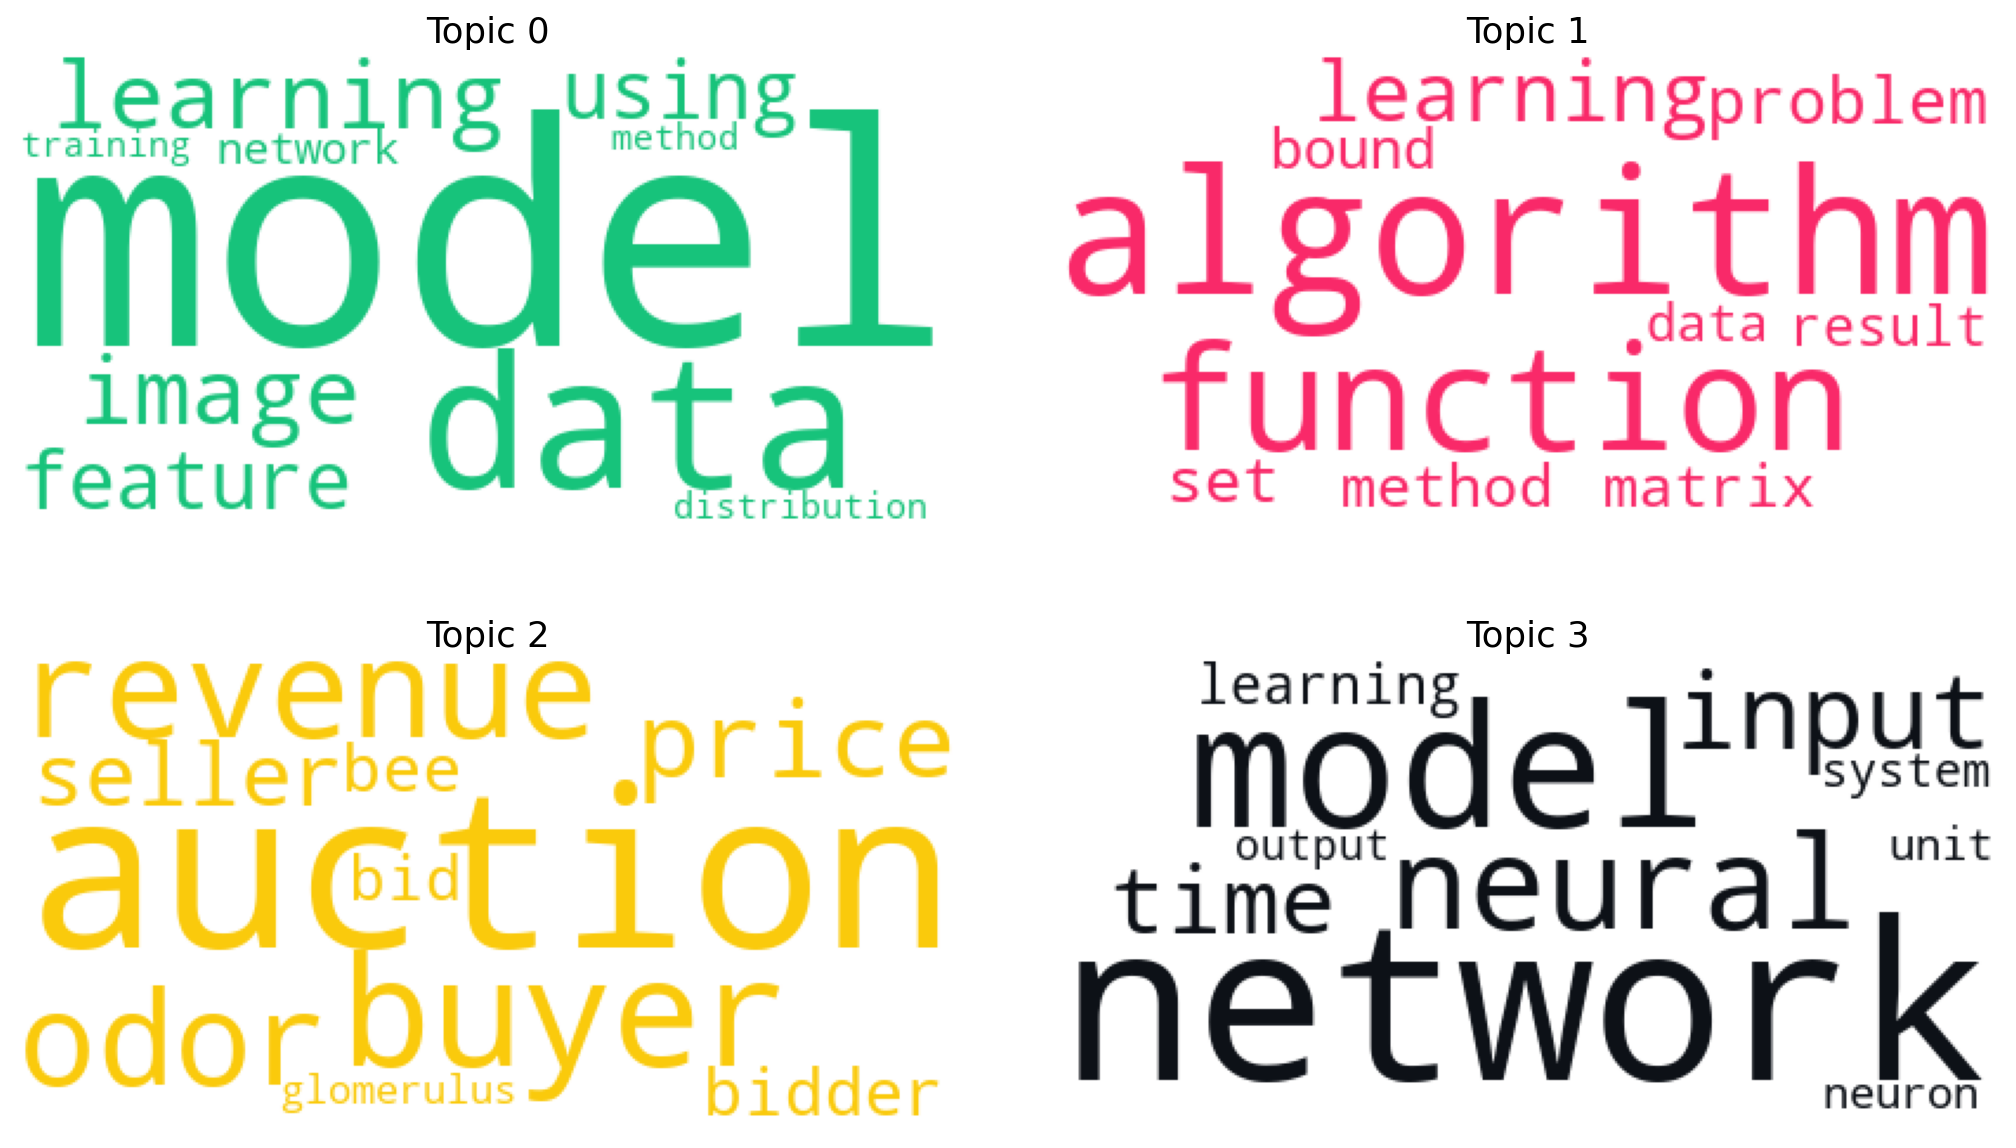

In [29]:
list_colors = ["#17C37B", "#F92969", "#FACA0C", "#0D1117"]

wc = WordCloud(
    background_color="white",
    max_words=10,
    max_font_size=300,
    colormap="tab10",
    color_func=lambda *args, **kwargs: list_colors[i],
    prefer_horizontal=1.0
)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharey=True, dpi=160)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    wc.generate_from_frequencies(topic_words)
    plt.gca().imshow(wc)
    plt.gca().set_title("Topic "+str(i), fontdict=dict(size=16))
    plt.gca().axis("off")

plt.axis("off")
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.margins(x=0, y=0)
plt.show()

<div style="margin: 10px;">
    <h3 style="font-family: Arial">
        <font color="#0E1117">
            5) Dominant topic for each document
        </font>
    </h3>
</div>

In [30]:
df_topics = pd.DataFrame(
    columns=["topic", "contribution", "keywords"]
)

# get main topic in each document
for i, list_rows in enumerate(lda_model[doc_term_matrix]):
    row = list_rows[0] if lda_model.per_word_topics else list_rows
    row = sorted(row, key=lambda x: (x[1]), reverse=True)
    
    # get the Dominant topic, Perc Contribution and Keywords for each document
    for j, (topic_num, prop_topic) in enumerate(row):
        if j == 0:
            wp = lda_model.show_topic(topic_num)
            topic_keywords = ", ".join([word for word, prop in wp])
            df_topics = df_topics.append(
                dict(
                    zip(
                        df_topics.columns,
                        [
                            int(topic_num),
                            round(prop_topic,4),
                            topic_keywords
                        ]
                    )
                ),
                ignore_index=True
            )
        else:
            break

# add original text to the end of the output
df_topics = pd.concat([df_topics, df_data["text"]], axis=1)

In [31]:
df_topics.head(3)

,topic,contribution,keywords,text
0,3,0.6592,"network, model, neural, input, time, learning,...",self organization associative databaseand appl...
1,3,0.9593,"network, model, neural, input, time, learning,...",mean field theory layer iv visual cortexand ap...
2,3,0.9981,"network, model, neural, input, time, learning,...",storing covariance associativelongterm potenti...


<div style="margin: 10px;">
    <h3 style="font-family: Arial">
        <font color="#0E1117">
            6) Topics' distribution
        </font>
    </h3>
</div>

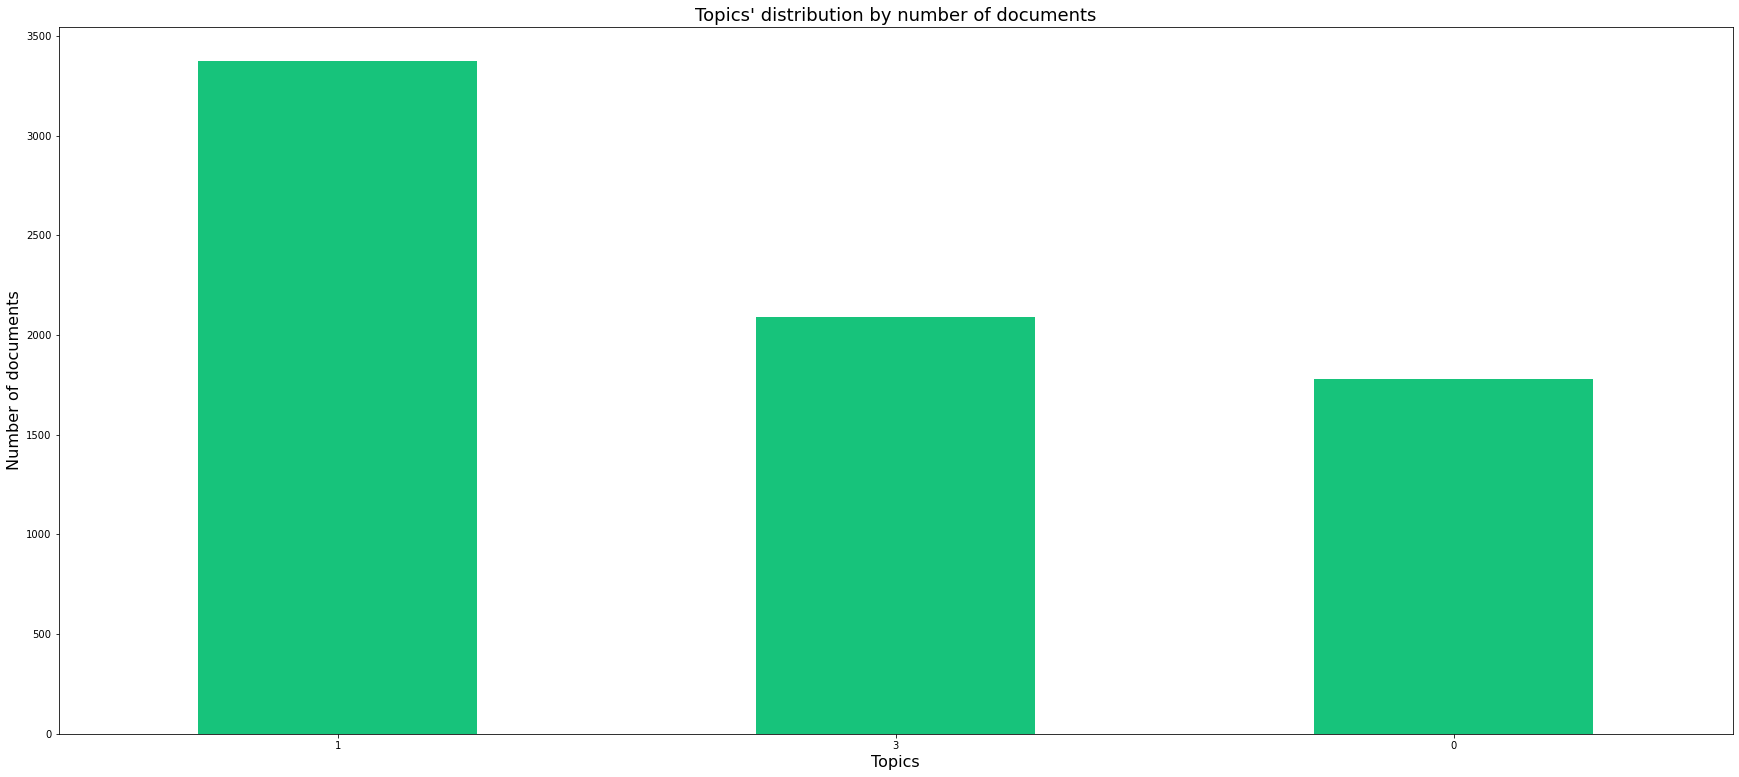

In [32]:
fig = plt.figure(figsize=(30, 13))
plt.subplot(1, 1, 1)
df_topics["topic"].value_counts().plot(kind="bar", color="#17C37B",)
plt.title("Topics' distribution by number of documents", size=18)
plt.xlabel("Topics", size=16)
plt.ylabel("Number of documents", size=16)
plt.xticks(rotation=0)
plt.subplots_adjust(hspace=0.3)
plt.show()

<div style="margin: 10px;">
    <h3 style="font-family: Arial">
        <font color="#0E1117">
            7) Topics' keywords
        </font>
    </h3>
</div>

In [33]:
df_data["topic"] = df_topics["topic"]

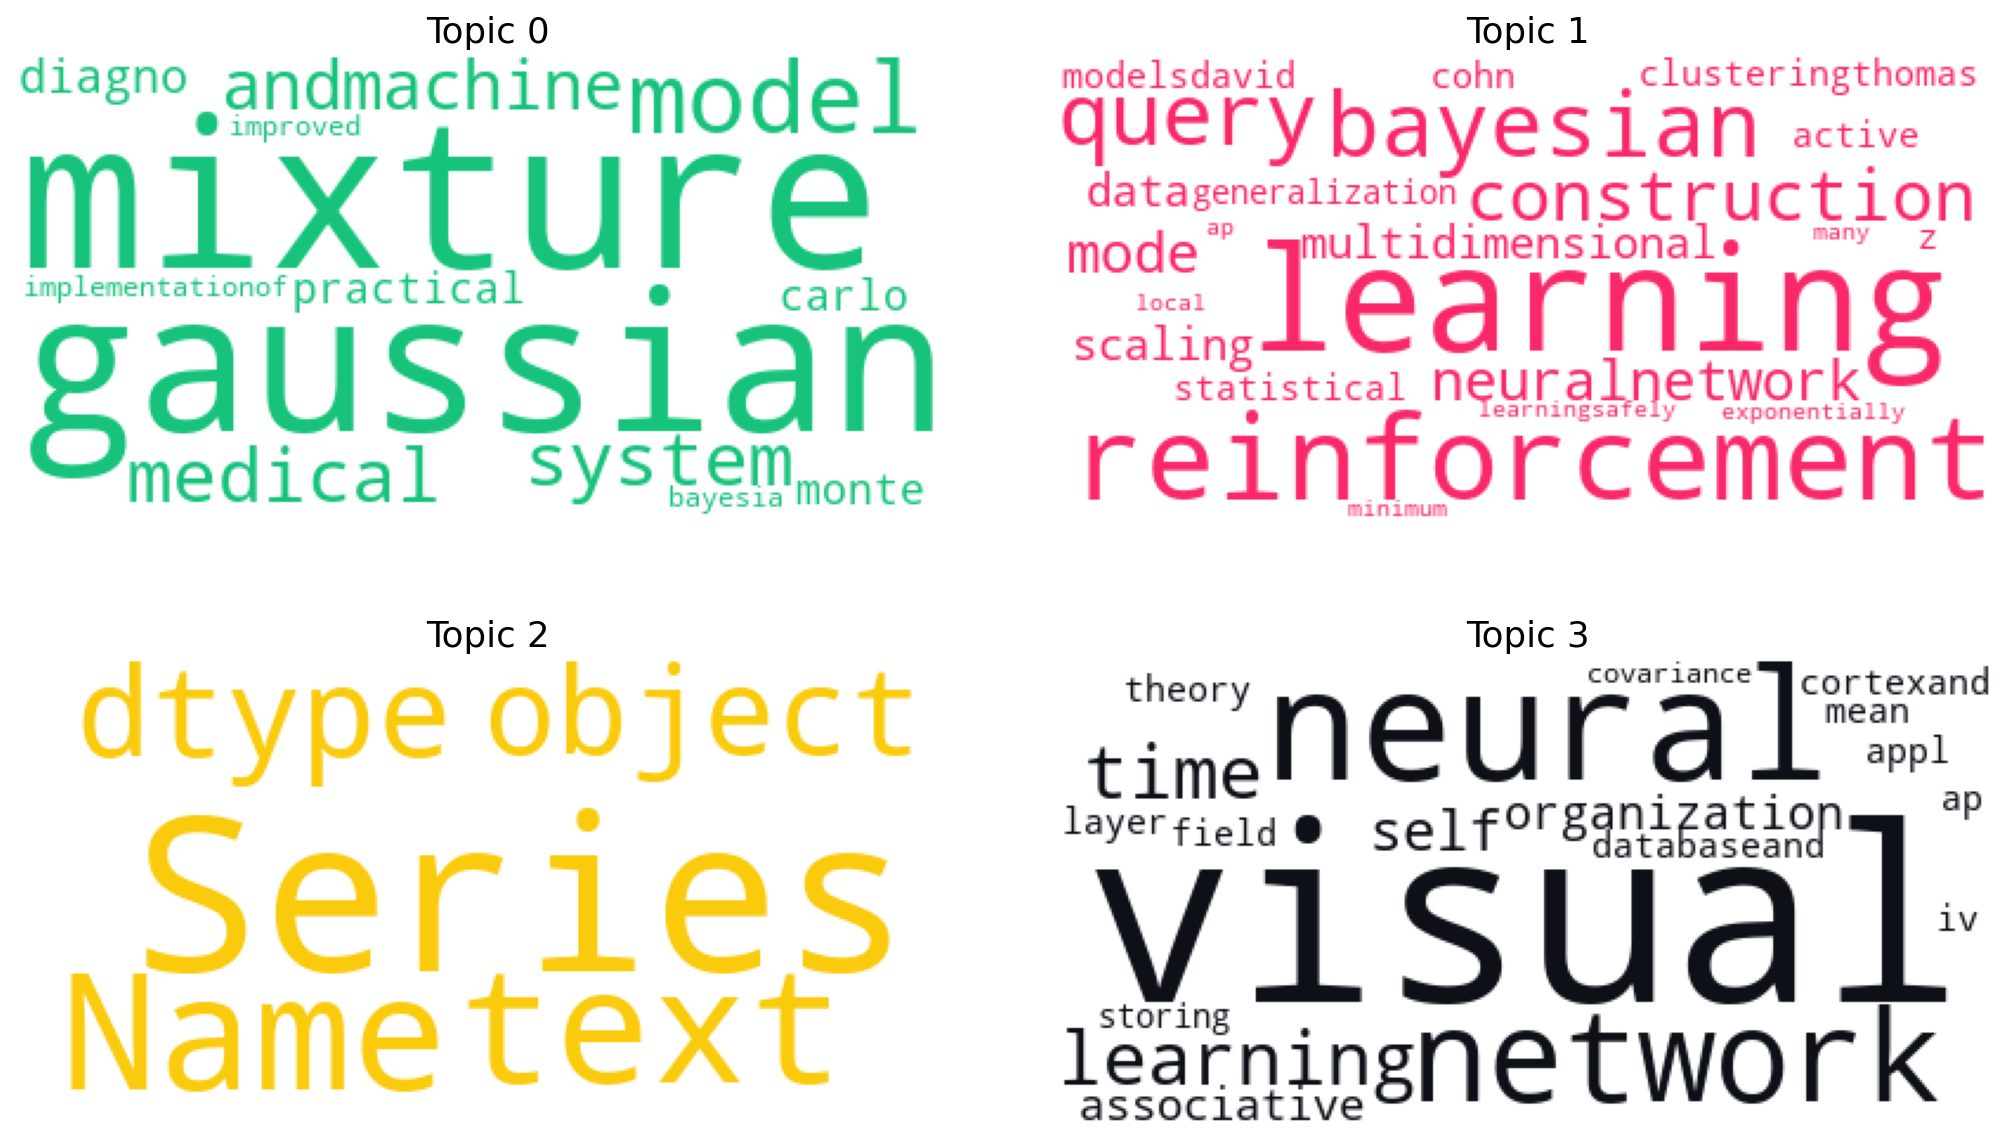

In [34]:
list_colors = ["#17C37B", "#F92969", "#FACA0C", "#0D1117"]

wc = WordCloud(
    max_words=30,
    min_font_size=10,
    background_color="white",
    colormap="tab10",
    color_func=lambda *args, **kwargs: list_colors[i],
    stopwords=None,
    prefer_horizontal=1.0
)

fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharey=True, dpi=160)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    wc.generate(
        str(df_data[df_data["topic"]==i]["text"])
    )
    plt.gca().imshow(wc)
    plt.gca().set_title("Topic "+str(i), fontdict=dict(size=16))
    plt.gca().axis("off")

plt.axis("off")
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.margins(x=0, y=0)
plt.show()

<div style="margin: 10px;">
    <h3 style="font-family: Arial">
        <font color="#0E1117">
            8) Topics' visualization
        </font>
    </h3>
</div>

gensim_models.prepare(lda_model, doc_term_matrix, dictionary)